In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from scipy.stats import skew
from sklearn.ensemble import RandomForestRegressor

import os
import warnings  
warnings.filterwarnings('ignore')

In [3]:
train_data = pd.read_csv('/content/msc_training_dataset.csv')
test_data = pd.read_csv('/content/msc_testing_dataset.csv')


In [4]:
train_duplicates = train_data.duplicated()
test_duplicates = test_data.duplicated()

In [5]:
print("Train Data Duplicates: ", train_duplicates.sum())
print("Test Data Duplicates: ", test_duplicates.sum())

Train Data Duplicates:  0
Test Data Duplicates:  0


In [6]:
print("Train Data:")
print(train_data.head())
print("\nTest Data:")
print(test_data.head())

Train Data:
   room  bathroom  kitchen  french_door  backyard  furnished  green_paint  \
0     3         1        2            1         1          0            1   
1     5         2        2            2         1          0            0   
2     1         2        1            2         0          0            0   
3     2         1        2            3         1          1            0   
4     5         1        2            1         0          0            1   

   solar_power  woodfloor  qlm_security  club_access  price  
0            0          0             1            1   6835  
1            0          0             1            1   9005  
2            0          1             1            0   5105  
3            0          1             1            0   9105  
4            0          1             0            0   8995  

Test Data:
   room  bathroom  kitchen  french_door  backyard  furnished  green_paint  \
0     1         1        1            3         0          0    

In [7]:
print("Train Data Summary Statistics:")
print(train_data.describe())
print("\nTest Data Summary Statistics:")
print(test_data.describe())

Train Data Summary Statistics:
              room     bathroom      kitchen  french_door    backyard  \
count  2512.000000  2512.000000  2512.000000  2512.000000  2512.00000   
mean      2.991242     1.495223     1.510748     2.001194     0.49164   
std       1.424568     0.500077     0.499984     0.813809     0.50003   
min       1.000000     1.000000     1.000000     1.000000     0.00000   
25%       2.000000     1.000000     1.000000     1.000000     0.00000   
50%       3.000000     1.000000     2.000000     2.000000     0.00000   
75%       4.000000     2.000000     2.000000     3.000000     1.00000   
max       5.000000     2.000000     2.000000     3.000000     1.00000   

         furnished  green_paint  solar_power    woodfloor  qlm_security  \
count  2512.000000  2512.000000  2512.000000  2512.000000   2512.000000   
mean      0.492834     0.490446     0.493232     0.508758      0.486863   
std       0.500048     0.500008     0.500054     0.500023      0.499927   
min       0

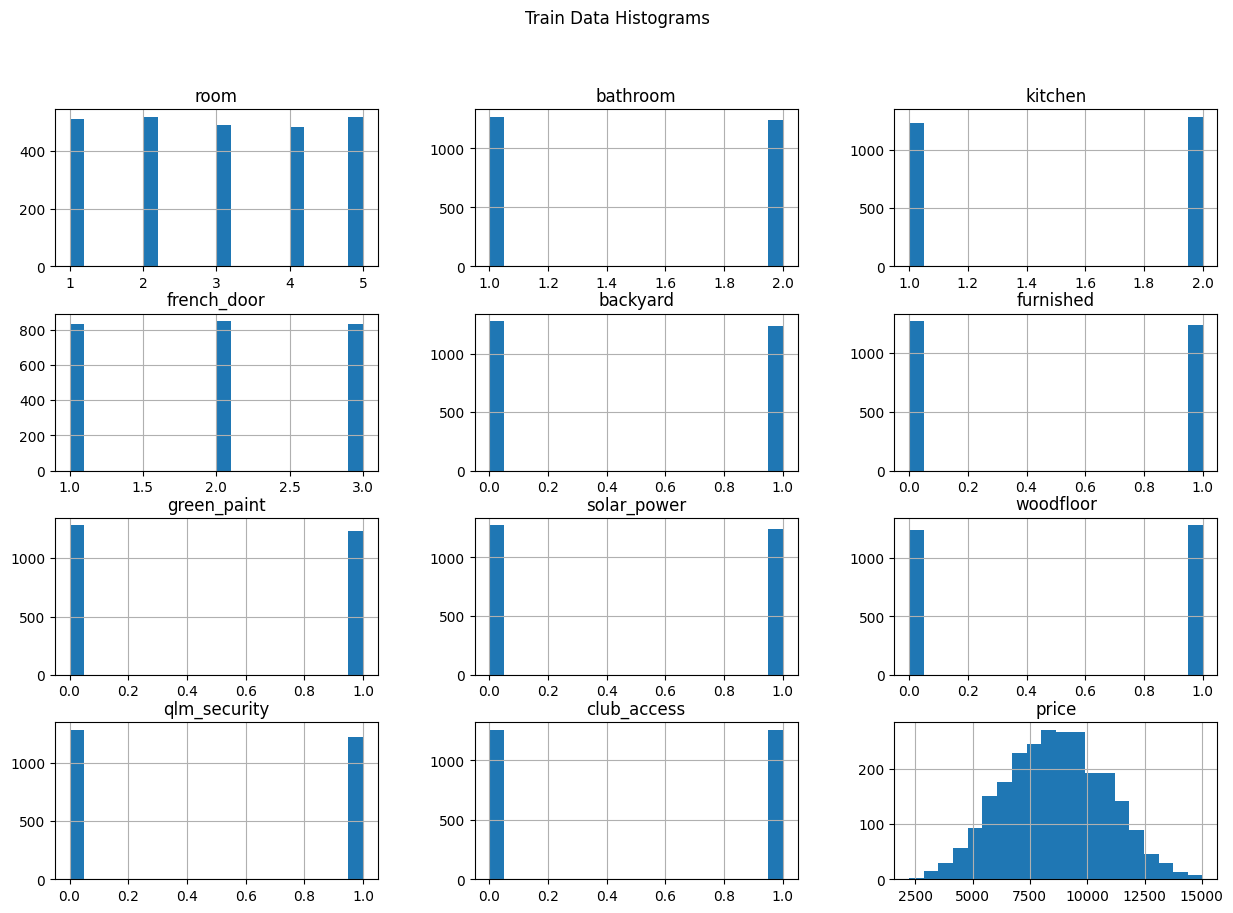

In [8]:
train_data.hist(bins=20, figsize=(15, 10))
plt.suptitle("Train Data Histograms")
plt.show()

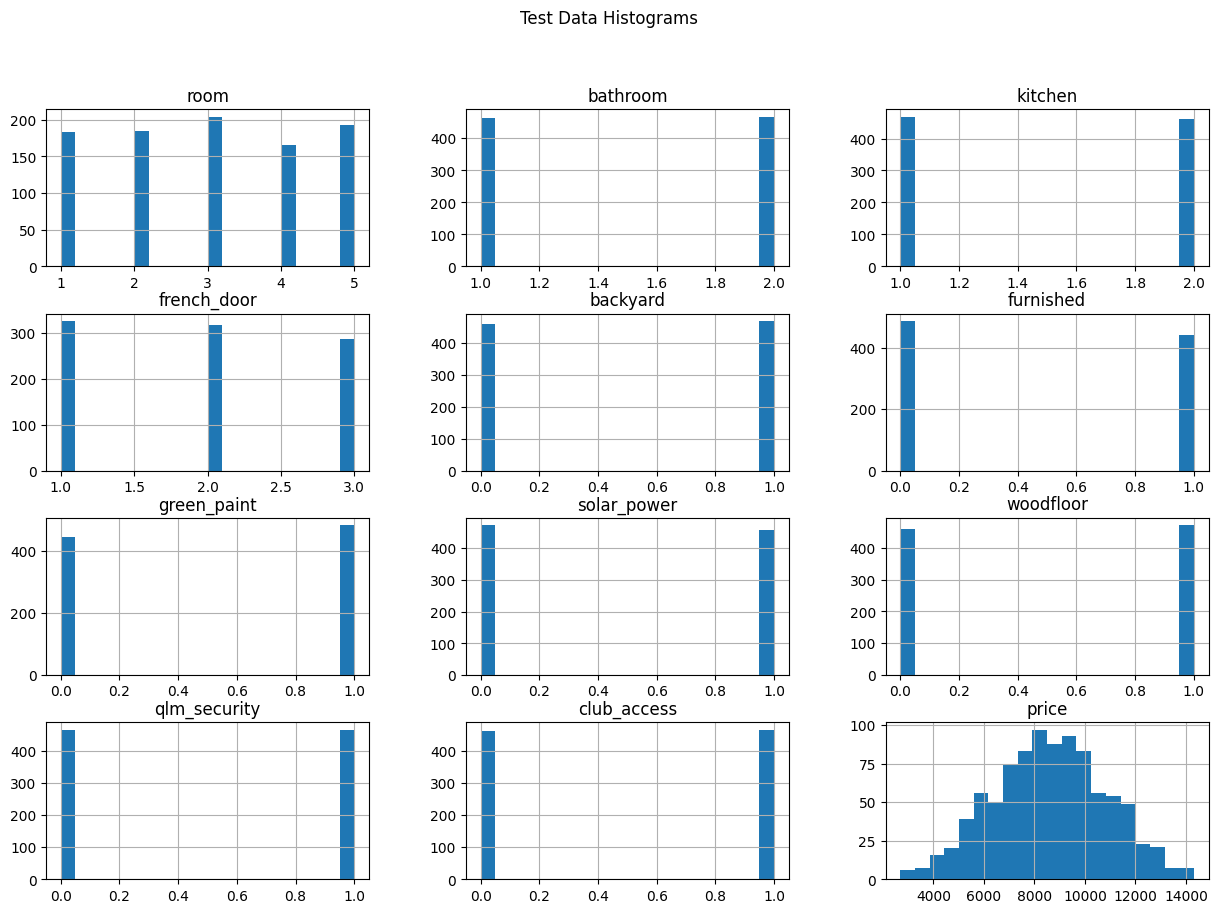

In [9]:
test_data.hist(bins=20, figsize=(15, 10))
plt.suptitle("Test Data Histograms")
plt.show()

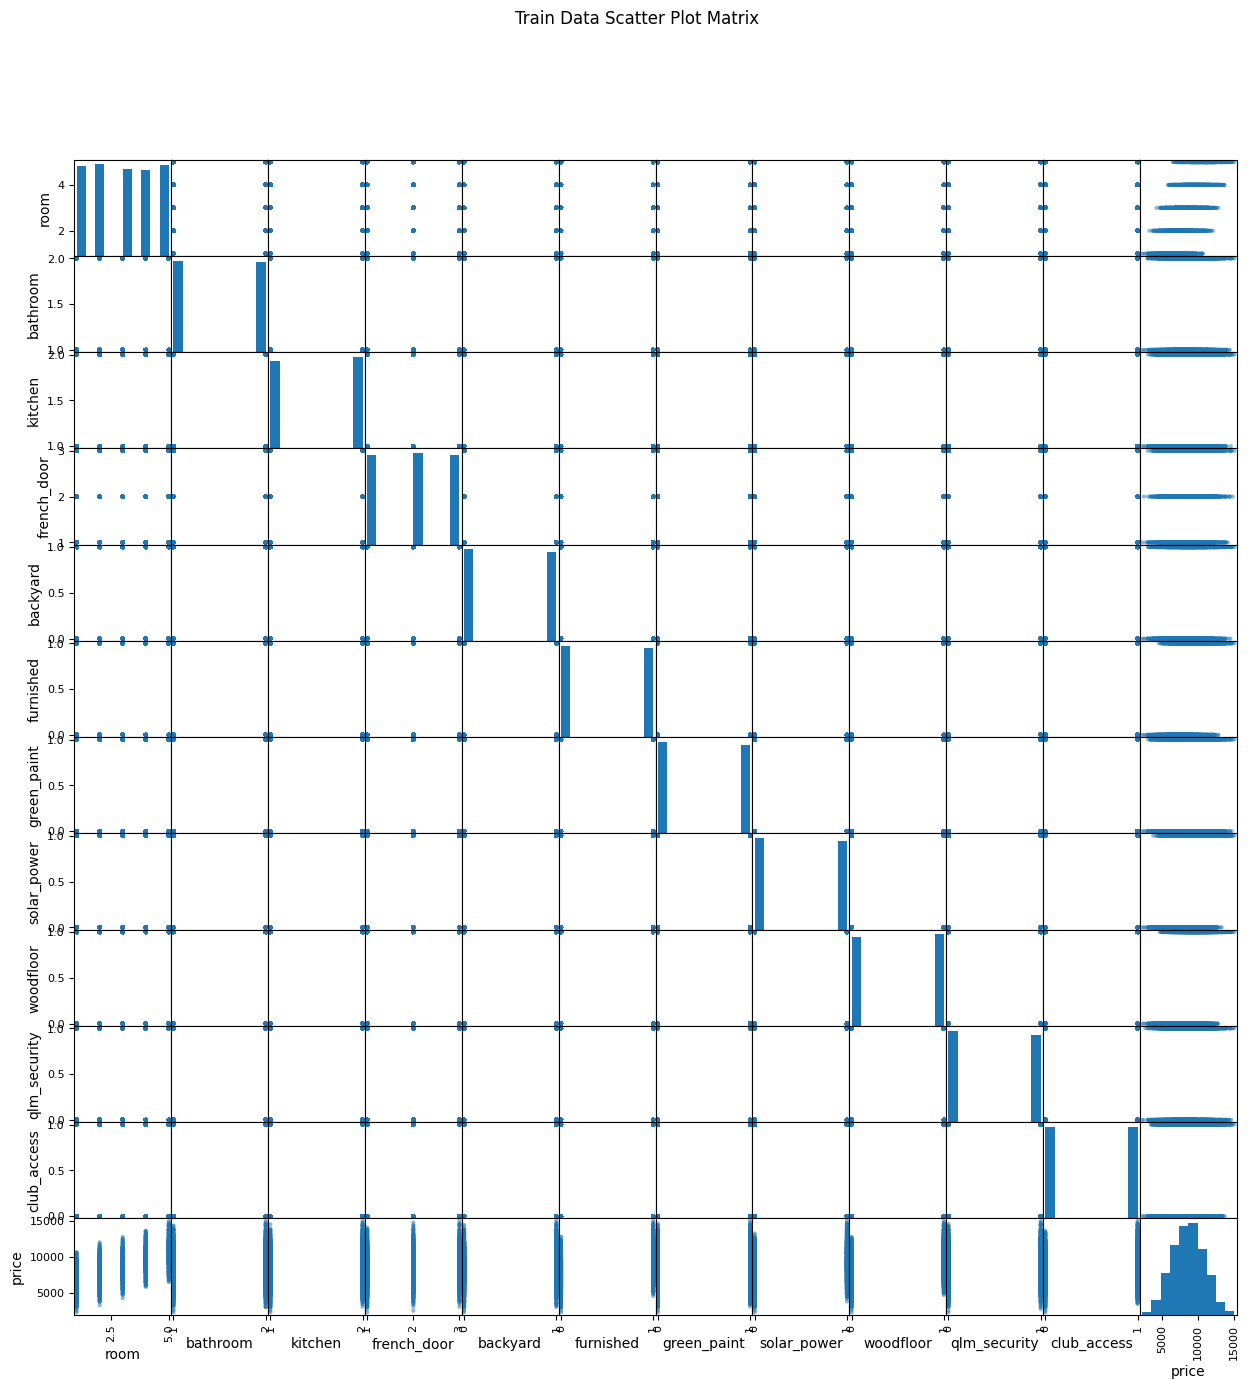

In [10]:
pd.plotting.scatter_matrix(train_data, figsize=(15, 15))
plt.suptitle("Train Data Scatter Plot Matrix")
plt.show()

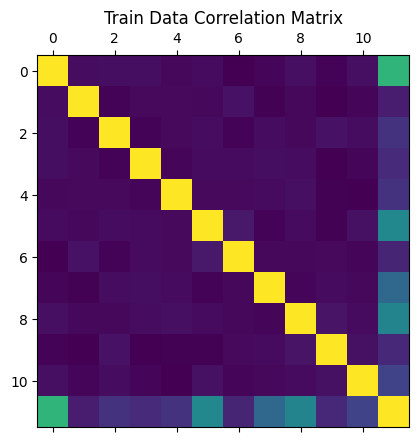

In [11]:
corr_matrix_train = train_data.corr()
plt.matshow(corr_matrix_train)
plt.title("Train Data Correlation Matrix")
plt.show()

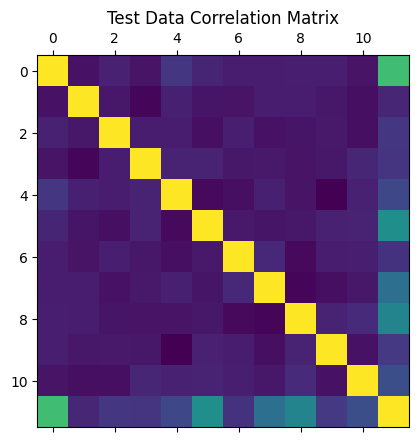

In [12]:
corr_matrix_test = test_data.corr()
plt.matshow(corr_matrix_test)
plt.title("Test Data Correlation Matrix")
plt.show()

In [13]:
print(train_data['price'].describe())

count     2512.000000
mean      8609.211783
std       2222.006893
min       2235.000000
25%       7005.000000
50%       8615.000000
75%      10197.500000
max      15035.000000
Name: price, dtype: float64


<Axes: xlabel='price', ylabel='Count'>

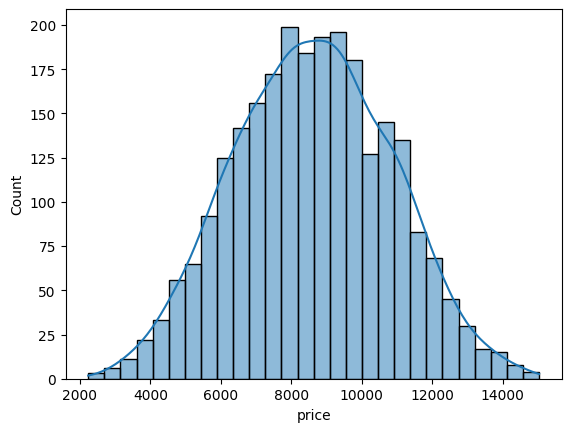

In [14]:
sns.histplot(train_data['price'],kde=True)

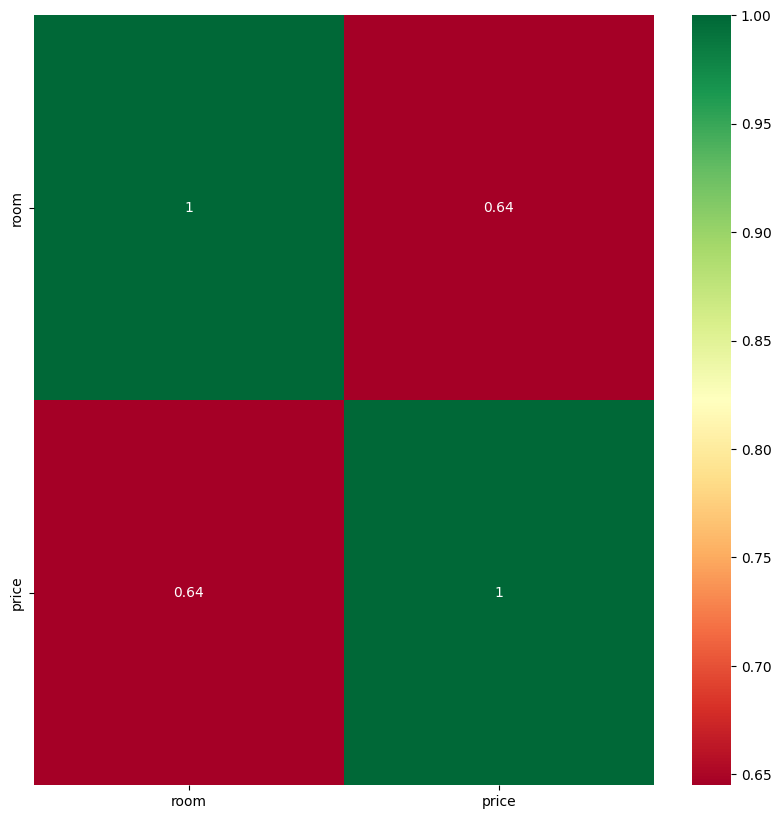

In [ ]:
corr = train_data.corr()
highly_corr_features = corr.index[abs(corr["price"])>0.5]
plt.figure(figsize=(10,10))
map = sns.heatmap(train_data[highly_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
corr["price"].sort_values(ascending=False).head(10)

price           1.000000
room            0.644894
furnished       0.453719
woodfloor       0.435437
solar_power     0.320911
club_access     0.178809
backyard        0.123133
kitchen         0.122473
french_door     0.096599
qlm_security    0.090566
Name: price, dtype: float64

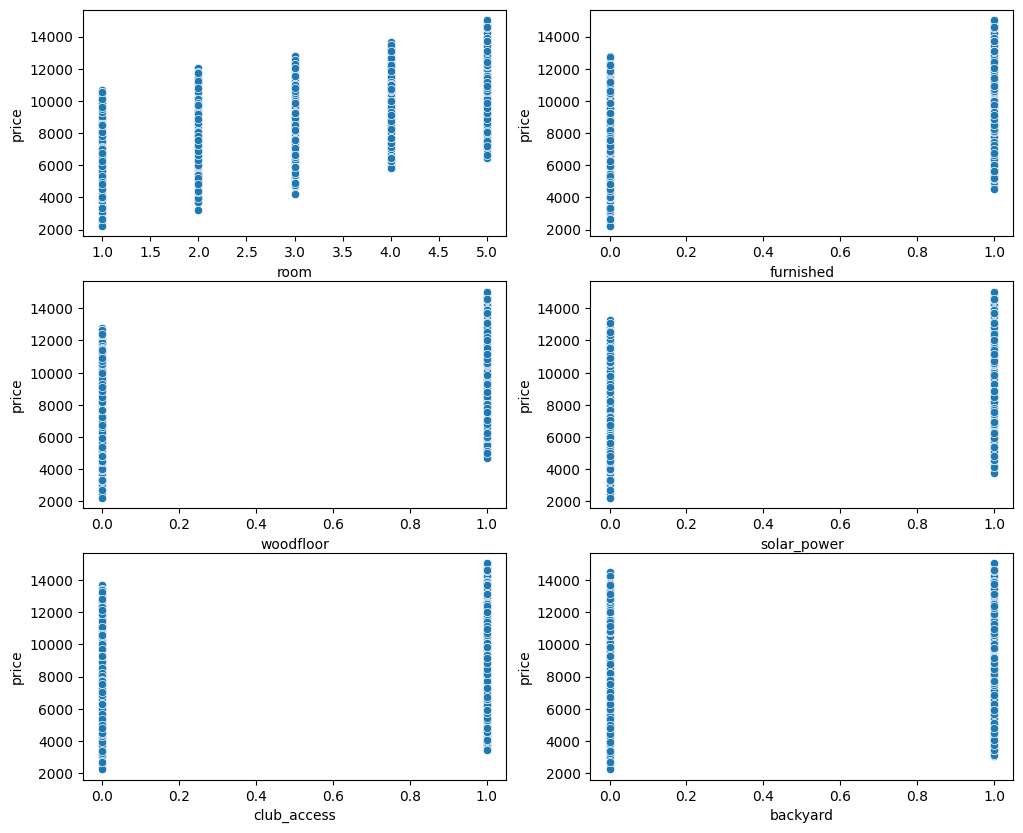

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(12,10))

#GarageArea
plt.subplot(321)
sns.scatterplot(data=train_data, x='room', y="price")

#YearBuilt
plt.subplot(322)
sns.scatterplot(data=train_data, x='furnished', y="price")

#WoodDeckSF
plt.subplot(323)
sns.scatterplot(data=train_data, x='woodfloor', y="price")

#OverallQual
plt.subplot(324)
sns.scatterplot(data=train_data, x='solar_power', y="price")

#BsmtUnfSF
plt.subplot(325)
sns.scatterplot(data=train_data, x='club_access', y="price")

#TotalBsmtSF
plt.subplot(326)
sns.scatterplot(data=train_data, x='backyard', y="price")

plt.show()


In [15]:
X_train = train_data.drop(['price'], axis=1)
y_train = train_data['price']

In [17]:
X_test = test_data.drop(['price'], axis=1)
y_test = test_data['price']

In [16]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [18]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [19]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Test R2 score:", r2)

Mean Squared Error: 51516.44505920344
Test R2 score: 0.9896317389674164


In [21]:
model.score(X_test,y_test)

0.9896317389674164

In [ ]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

room            0.422028
bathroom        0.004904
kitchen         0.011089
french_door     0.008685
backyard        0.014089
furnished       0.199266
green_paint     0.006738
solar_power     0.117936
woodfloor       0.180445
qlm_security    0.008793
club_access     0.026027
dtype: float64


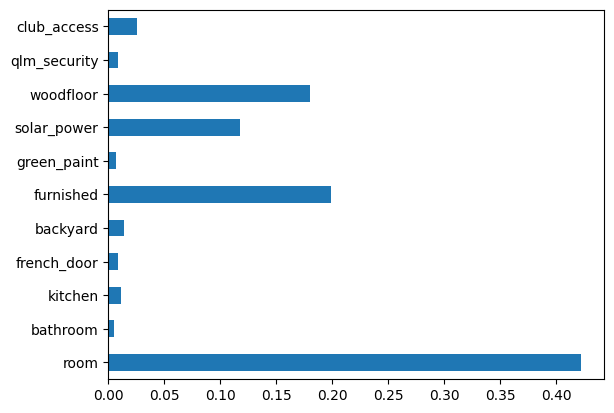

In [ ]:
importances = pd.Series(model.feature_importances_, index=X_train.columns)
print(importances)
importances.plot(kind='barh')
plt.show()

OOB R2 score: 0.9850597575179267
OOB MSE score: 73735.31288321751
room            0.422028
bathroom        0.004904
kitchen         0.011089
french_door     0.008685
backyard        0.014089
furnished       0.199266
green_paint     0.006738
solar_power     0.117936
woodfloor       0.180445
qlm_security    0.008793
club_access     0.026027
dtype: float64


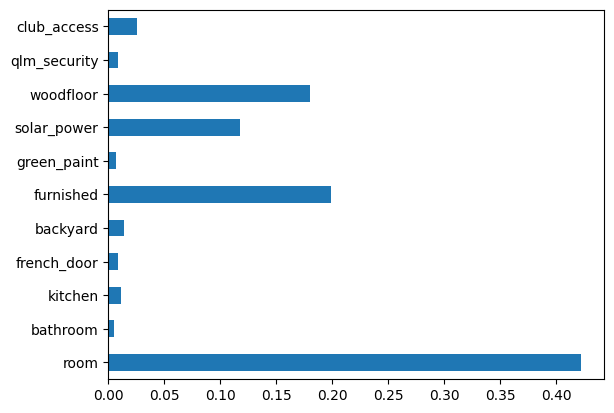

In [ ]:
modelWithoob = RandomForestRegressor(random_state=42, oob_score=True)

# RF model fit with OOB
modelWithoob.fit(X_train, y_train)

# Evaluate OOB score
print('OOB R2 score:', modelWithoob.oob_score_)
print('OOB MSE score:', mean_squared_error(y_train, modelWithoob.oob_prediction_))

# Obtain feature importances and plot them
importances = pd.Series(modelWithoob.feature_importances_, index=X_train.columns)
print(importances)
importances.plot(kind='barh')
plt.show()

In [ ]:
param_grid = {
    'n_estimators': [5, 10, 15, 20]
    #,'max_depth': [None, 2, 5, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}
print(scoring)

{'R2': 'r2', 'MSE': 'neg_mean_squared_error'}


In [ ]:
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring=scoring, refit='R2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'n_estimators': [5, 10, 15, 20]}, refit='R2',
             scoring={'MSE': 'neg_mean_squared_error', 'R2': 'r2'})

In [ ]:
y_pred = grid_search.predict(X_test)
print('Test R2 score:', r2_score(y_test, y_pred))
print('Test MSE score:', mean_squared_error(y_test, y_pred))

Test R2 score: 0.9886589116924284
Test MSE score: 56350.10064585576


In [ ]:
print('Best hyperparameters:', grid_search.best_params_)
print('Best R2 score:', grid_search.best_score_)
print('Best MSE score:', abs(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))

Best hyperparameters: {'n_estimators': 20}
Best R2 score: 0.9817287552397751
Best MSE score: 89063.82359488487


room            0.421473
bathroom        0.004900
kitchen         0.010831
french_door     0.008478
backyard        0.014581
furnished       0.200601
green_paint     0.006550
solar_power     0.116880
woodfloor       0.180957
qlm_security    0.008772
club_access     0.025978
dtype: float64


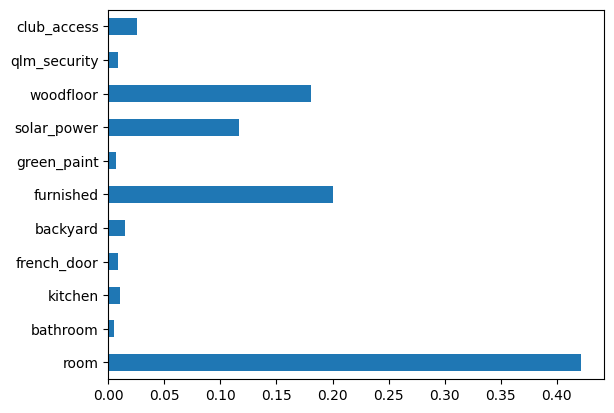

In [ ]:
importances = pd.Series(grid_search.best_estimator_.feature_importances_, index=X_train.columns)
print(importances)
importances.plot(kind='barh')
plt.show()

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the predicted values
print(y_pred)

[ 5329.7  7714.6 11389.3  8779.5 11104.5 11422.2 11740.2  6908.9  7824.5
  5832.   9320.4  8496.4  7084.9 11220.3  7305.2  9468.2  8902.5 12756.3
  9842.5  6947.1  8860.4  7533.8  7139.4  4339.1 10006.9  7360.5  7311.2
  8999.7  6823.1  9290.9  6569.4 10181.3 10539.9  8244.3  7715.4 10255.5
  9258.3 11040.9  9365.1 13257.   6725.8  5274.4  9999.7  8960.  11617.9
  6127.9  4420.  11381.4  9435.9  5442.4 11629.4 10624.2  4892.1  7900.3
 13617.9  9695.8  6155.4  8582.3 10095.2  7719.   7919.7 13576.3  7310.9
  8461.3 12621.   7182.4 11399.3 10557.6  9962.8  5582.9  8205.6 12106.7
  4239.2  6228.6  9429.7  8680.5  6920.1 11199.3 10868.8 10555.6  8875.1
  7519.7 11912.4  8209.4 11733.7  6259.2  8540.2  8279.1  6916.2  8306.2
  7778.4 12136.1 11726.5  7918.9 11027.  11086.1  8228.1  9104.8  7379.7
  7024.8  8852.7  4670.8  9842.6  5776.3  4917.7 10656.4  9783.2  8547.
 12708.4  7823.1  6063.7  9209.9  6577.   9249.5  9699.4 10133.8  7163.7
  8948.5  7475.5  8003.6  7399.1  6610.4  8592.9 123

In [22]:
# set the print options for numpy arrays
np.set_printoptions(precision=2, suppress=True)

# print the predicted values
print(y_pred)

[ 5329.7  7714.6 11389.3  8779.5 11104.5 11422.2 11740.2  6908.9  7824.5
  5832.   9320.4  8496.4  7084.9 11220.3  7305.2  9468.2  8902.5 12756.3
  9842.5  6947.1  8860.4  7533.8  7139.4  4339.1 10006.9  7360.5  7311.2
  8999.7  6823.1  9290.9  6569.4 10181.3 10539.9  8244.3  7715.4 10255.5
  9258.3 11040.9  9365.1 13257.   6725.8  5274.4  9999.7  8960.  11617.9
  6127.9  4420.  11381.4  9435.9  5442.4 11629.4 10624.2  4892.1  7900.3
 13617.9  9695.8  6155.4  8582.3 10095.2  7719.   7919.7 13576.3  7310.9
  8461.3 12621.   7182.4 11399.3 10557.6  9962.8  5582.9  8205.6 12106.7
  4239.2  6228.6  9429.7  8680.5  6920.1 11199.3 10868.8 10555.6  8875.1
  7519.7 11912.4  8209.4 11733.7  6259.2  8540.2  8279.1  6916.2  8306.2
  7778.4 12136.1 11726.5  7918.9 11027.  11086.1  8228.1  9104.8  7379.7
  7024.8  8852.7  4670.8  9842.6  5776.3  4917.7 10656.4  9783.2  8547.
 12708.4  7823.1  6063.7  9209.9  6577.   9249.5  9699.4 10133.8  7163.7
  8948.5  7475.5  8003.6  7399.1  6610.4  8592.9 123

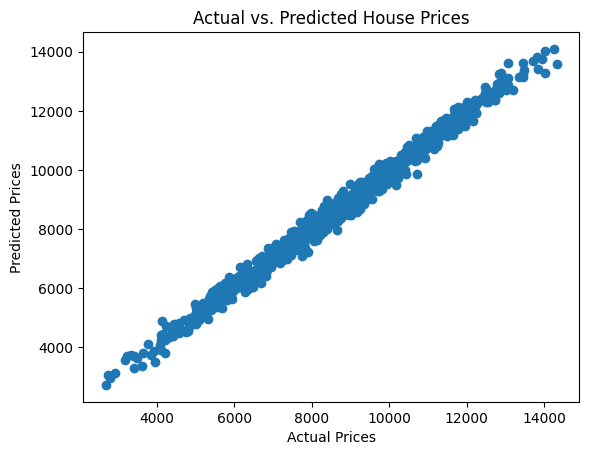

In [23]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.show()

In [24]:
df = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': y_pred})

# Print the DataFrame
print(df)

     Actual Prices  Predicted Prices
0             5068            5329.7
1             7658            7714.6
2            11318           11389.3
3             8858            8779.5
4            11178           11104.5
..             ...               ...
924           9788           10069.1
925          10088            9947.7
926           9388            8946.8
927           8528            8591.8
928           6118            6282.8

[929 rows x 2 columns]


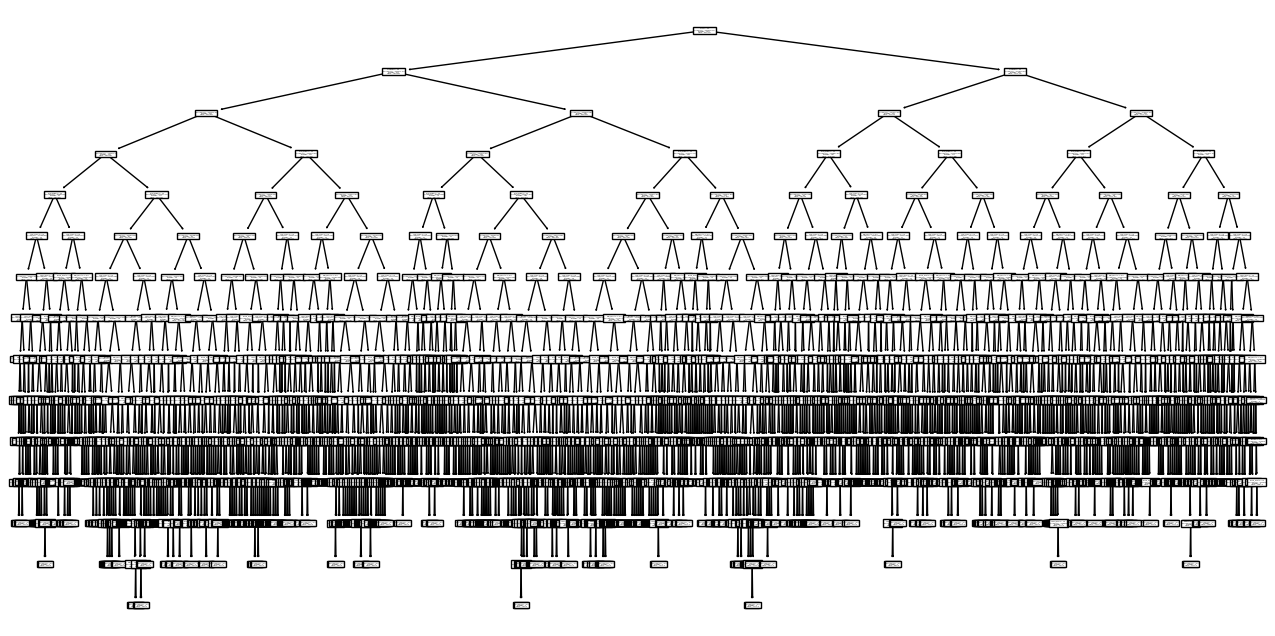

In [ ]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(16, 8))
plot_tree(grid_search.best_estimator_[0], ax=ax, feature_names=X_train.columns)
plt.show()